# Homework 7 Computational Problems

## Problem 1: Solving linear systems with the QR decomposition

As we discussed in lab, the QR decomposition is particularly useful for solving linear systems of equations of the form $Ax = b$ using the following two-step procedure:

1. Compute the QR decomposition of $A = QR$
2. Solve the upper triangular system of equations $Rx = Q^\top b$ using the backsubstitution algorithm; the solution $x_\star$ you obtain will be a solution to the system $Ax=b$

Here we will see some examples of this method.

### Part A: Inverting square matrices

Given an $n\times n$, invertible matrix $A$, we often want to find the inverse $A^{-1}$. This task can be thought of as solving the following system of $n^2$ equations:

$$
AX = I
$$

where the solution $X_\star = A^{-1}$ will be the inverse of $A$. Note that this is equaivalent to solving $n$ different linear systems in $n$ constraints of the form:

$$
Ax = e_i, \text{    for } i=1,\dots,n,
$$

where $e_i$ is the $i$th standard basis vector. The solution $x_\star$ to the $i^{th}$ of these systems gives us the $i^{th}$ column of the inverse $A^{-1}$.

Write a function `matrix_inverse(A)` which takes in a square, invertible matrix `A` and computes its inverse using the method described above (i.e. use backsubstitution to solve $n$ different linear systems, which will give you the $n$ columns of $A^{-1}$). For this problem, you can either use the functions given in the lab to compute the QR decomposition and perform backsubstitution, or you can use built-in functions in Python (e.g. `np.linalg.qr(A)` and `scipy.linalg.solve_triangular(R,b)` for backsubstitution). Test your implementation on the following matrices, and verify that $AA^{-1} = I$ for each of them. 

In [1]:
import numpy as np
from scipy.linalg import solve_triangular

A_1 = np.array([
    [1, -1, 0],
    [0, 1, -1],
    [1, 1, 1]
])
A_2 = np.random.normal(size = (20,20))

In [3]:
def matrix_inverse(A):
    Q, R = np.linalg.qr(A)
    A_inv = np.empty(A.shape)
    #I = np.eye(A.shape[0])
    for i in range(A.shape[0]):
        ei = np.zeros(A.shape[0])#I[:,i]
        ei[i] = 1.
        A_inv[:,i] = solve_triangular(R, np.dot(Q.T, ei))
    return A_inv

A_1_inv = matrix_inverse(A_1)
A_2_inv = matrix_inverse(A_2)

print(A_1@A_1_inv)
#print(np.allclose(A_1@A_1_inv, np.eye(3)))
#print(np.allclose(A_2@A_2_inv, np.eye(20)))

[[ 1.00000000e+00 -5.55111512e-17 -2.22044605e-16]
 [-1.11022302e-16  1.00000000e+00  5.55111512e-17]
 [-3.33066907e-16 -1.11022302e-16  1.00000000e+00]]


### Part B: overdetermined systems

So far, we've mainly discussed solving systems $Ax = b$ in the case when $A$ is square and invertible. However, we will often be interested in the case when $A$ is not square, say $m\times n$. In the case when $m > n$, so that $A$ is "tall", we may not have a solution for any particular value of $b$ -- this is because the function $f(x) = Ax$ is not surjective. Instead, we may be content to settle for an approximate solution. One way to find such a solution is to consider instead a solution to the system

$$
A^\top A x = A^\top b
$$

where now $A^\top A$ is a square, $n\times n$ matrix (we will justify this approach later in the class when we discuss least squares). If we plug in the QR decomposition for $A$ to this equation we get

$$
(QR)^\top QR x = (QR)^\top b \iff Rx = Q^\top b 
$$

which we recognize as the same expression we obtained in the square case, and the solution $x_\star$ can be found via backsubstitution. Hence the same method we used in the square case can also find us an approximate solution in the overdetermined case.

Consider values of $A$ and $b$ defined in the following cell.

In [5]:
A = np.array([np.ones(20), np.random.normal(size=20)]).T
b = np.dot(A, np.random.rand(2)) + 0.3*np.random.randn(20)

Using these values, perform the method described above to find an approximate solution $x = (x_1, x_2)$ to the system $Ax=b$. Given this solution, create a scatter plot of the vector $b$ (on the y-axis) versus the second column of $A$ (on the x-axis), and overlay a plot of the scalar function $g(a) = x_1 + ax_2$. What does the function $g$ appear to be?

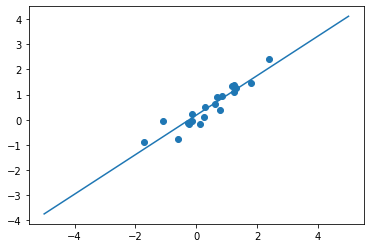

In [6]:
Q, R = np.linalg.qr(A)
x_star = solve_triangular(R, np.dot(Q.T, b))

import matplotlib.pyplot as plt

def g(a):
    return x_star[0] + a*x_star[1]

aa = np.linspace(-5,5,2)
plt.scatter(A[:,1], b)
plt.plot(aa, g(aa))
plt.show()